## OSM Bootcamp 2018 Exercise Set 1


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

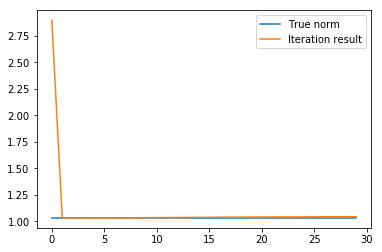

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import vectorize, jit, njit, float64, prange
%matplotlib inline

def problem1():
    mat = np.loadtxt("matrix_data.txt")
    matrix_norm = np.linalg.norm(mat, 2)
    #print(matrix_norm)
    #print(len(mat))
    random_vector = np.array([1]*len(mat))
    random_vector = random_vector.reshape((-1,1))
    #print(random_vector)


    iteration = 30
    temp = np.dot(mat, random_vector)
    result = [0]*iteration
    result[0] = np.linalg.norm(temp, 2) ** (1/(1))

    for i in range(2, iteration+1):
        temp = np.dot(mat, temp)
        result[i-1] = np.linalg.norm(temp, 2) ** (1/(iteration))

    truth = [matrix_norm]*iteration
    plt.plot(truth, label = "True norm")
    plt.plot(result, label = "Iteration result")
    plt.legend()
    plt.show()
    
problem1()

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



The histograms look pretty much alike.


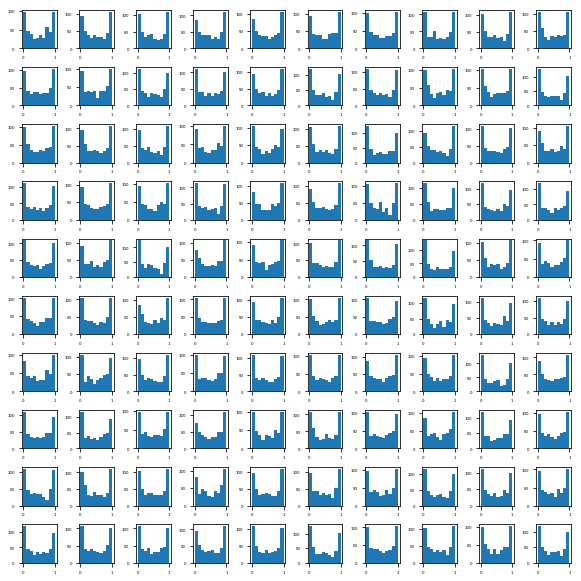

In [6]:
@jit
def problem2():
    SMALL_SIZE = 4
    MEDIUM_SIZE = 5
    BIGGER_SIZE = 6

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

    iteration = 500

    #draw 100 samples

    x_0_grid = np.random.uniform(0,1, 100)
    #print(x_0_grid)
    x=0
    plt.figure(figsize = [8,8])
    for j in range(100):
        x = x_0_grid[j]
        result = np.empty(iteration)
        result[0] = func(x)
        #print(result)
        for i in range(1, iteration):
            result[i] = func(result[i-1])

        #result = np.empty_like(x_0_grid)
        plt.subplot(10,10,j+1)
        plt.hist(result)

    plt.tight_layout()
    print("The histograms look pretty much alike.")
    plt.show()
    #print(result)


@jit
def func(x):
    return 4 * x * (1 - x)


problem2()


### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

Prove this.

By assumption, $\lim_{t \to \infty} g^t(x) = \hat{x}$ for some $x$.
Now, pick any $x_0$ such that the above limit converges. Let $x_1 = g(x_0), x_2 = g(x_1), ... x_t = g(x_{t-1}), ...$ Then it follows that $\lim_{t \to \infty} x_t = \lim_{t \to \infty} g(x_{t-1}) = \hat{x}$.
Since $g$ is continuous at $\hat{x}$, $\exists \delta > 0$, such that $g$ is continuous on $B(\hat{x}, \delta)$, the interval centered at $\hat{x}$ with radius $\delta$. By definition of limit, fix this $\delta > 0, \exists N \in \mathbb{N}$, s.t. if $n>N, |x_n - \hat{x}| < \delta.$ We consider the subsequence of $\{x_t\}_{t=N+1}^{\infty},$ where each each $x_t$ falls in the interval where $g$ is continuous.
By the sequential characterization of continuous function, we have 
$$\hat{x} = \lim_{t \to \infty} g(x_t) = g(\lim_{t \to \infty} x_t) = g(\hat{x}).$$ Hence $\hat{x}$ is a steady state.